<a href="https://colab.research.google.com/github/laerteluizf/Proc_Imagens_2025_2/blob/main/Proc_Imagens_3_Tarefa_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils
from google.colab.patches import cv2_imshow


    # Exibir as imagens para comparação
def look_2(imagem_1, legenda_1, imagem_2, legenda_2):

  fig, axs = plt.subplots(1, 2, figsize=(10, 5))

  axs[0].imshow(imagem_1, cmap='gray')
  axs[0].set_title(legenda_1)
  axs[0].axis('off')

  axs[1].imshow(imagem_2, cmap='gray')
  axs[1].set_title(legenda_2)
  axs[1].axis('off')

  plt.tight_layout()
  plt.show()


In [14]:
#Atividade 4 - Transformações de intensidade

def transforma_negativo(imagem):
    if imagem is None:
        print('Erro: Não foi possível carregar a imagem.')
    else:
        imagem_neg = 255 - imagem
        #imagem_red = imutils.resize(imagem_neg, height=400)

        #return imagem_red
        return imagem_neg



def transforma_logaritmica(imagem):
    if imagem is None:
        print('Erro: A imagem de entrada é None.')
        return None

    # Normalizar os valores de pixel para a faixa [0, 1]
    r_normalizado = imagem.astype(np.float32) / 255.0
    c = 1.0 / np.log(1 + np.max(r_normalizado))

    # Aplica a fórmula logarítmica
    s_log = c * np.log(1 + r_normalizado)

    # Reconverter para o formato de imagem 8-bit (0-255)
    imagem_log_final = np.uint8(s_log * 255)

    return imagem_log_final



def transforma_potencia_gama(imagem, gama):
    if imagem is None:
        print('Erro: A imagem de entrada é None.')
        return None

    # Normalizar para [0, 1] e converter para float32
    r_normalizado = imagem.astype(np.float32) / 255.0

    # Aplicar a fórmula: s = r^gama
    imagem_gama = np.power(r_normalizado, gama)

    # Reconverter para o formato de imagem 8-bit (0-255)
    imagem_gama_final = np.uint8(imagem_gama * 255)

    return imagem_gama_final


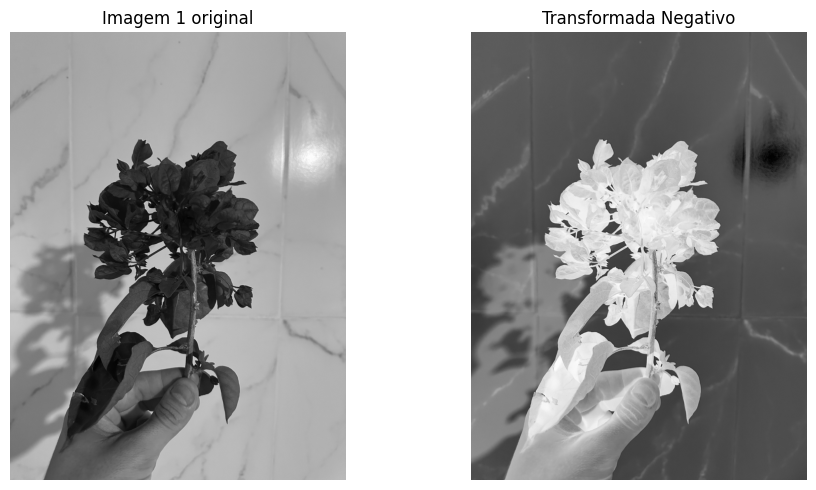

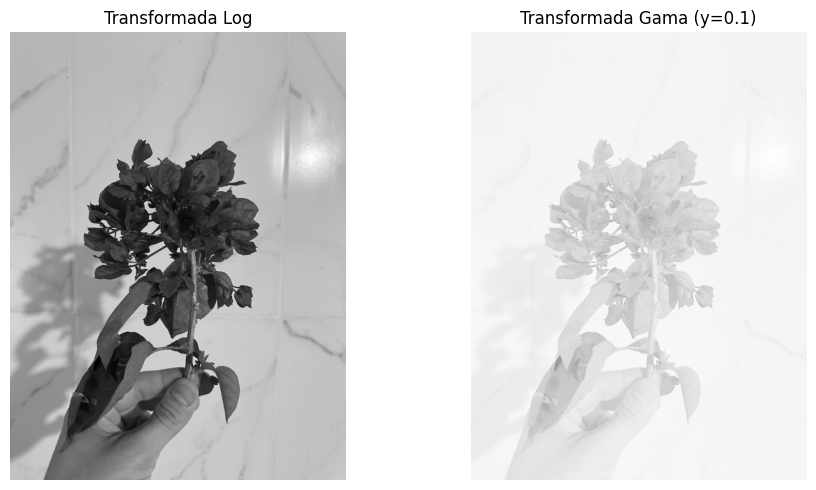

In [25]:
caminho_imagem_1 = '/content/drive/MyDrive/Proc de Imagens 2025 2/Imagem Cinza/flor_i_d_5.jpeg'
caminho_imagem_2 = '/content/drive/MyDrive/Proc de Imagens 2025 2/Imagem Cinza/flor_i_n_5.jpeg'
caminho_imagem_3 = '/content/drive/MyDrive/Proc de Imagens 2025 2/Imagem Cinza/flor_o_d_5.jpeg'
caminho_imagem_4 = '/content/drive/MyDrive/Proc de Imagens 2025 2/Imagem Cinza/flor_o_n_5.jpeg'


imagem_ori = cv2.imread(caminho_imagem_1)
legenda_ori = 'Imagem 1 original'

imagem_trans_1 = transforma_negativo(imagem_ori)
legenda_trans_1 = 'Transformada Negativo'

imagem_trans_2 = transforma_logaritmica(imagem_ori)
legenda_trans_2 = 'Transformada Log'

gama = 0.1
imagem_trans_3 = transforma_potencia_gama(imagem_ori, gama)
legenda_trans_3 = f'Transformada Gama (y={gama})'


look_2(imagem_ori, legenda_ori, imagem_trans_1, legenda_trans_1)
look_2(imagem_trans_2, legenda_trans_2, imagem_trans_3, legenda_trans_3)
